In [15]:
#99% 신뢰구간 구하기
from scipy.stats import norm 
import numpy as np
mean_s = 84.3
std_s = 12/np.sqrt(15)
rv=norm()
print(rv.isf(0.005)) #0.01/2
lowerbound = mean_s - rv.isf(0.005)*std_s
upperbound = mean_s + rv.isf(0.005)*std_s
print(lowerbound, upperbound)

2.575829303548901
76.31908480374564 92.28091519625436


In [16]:
#t-test 한 집단의 평균 - 1보다 크다고 볼 수 있는가 
from scipy import stats
samples = [1.11, 1.07, 1.11, 1.07, 1.12, 1.08, 1.08, 1.18, 1.18, 1.18, 1.12]
stats.ttest_1samp(samples, popmean=1, alternative="greater")

Ttest_1sampResult(statistic=8.953813600283121, pvalue=2.166934837557583e-06)

In [17]:
#두집단의 평균 비교
#세타1 =/= 세타2
from scipy import stats
control= [320,430,530,360,280,420,370,380,470,430]
treat = [260,750,430,790,470,860,490,620,520,460]
tstat, pval = stats.ttest_ind(control, treat, equal_var=False)
print("t-stat:%.3f p-value:%.3f" % (tstat, pval))

#세타1 == 세타2
from scipy import stats
control= [320,430,530,360,280,420,370,380,470,430]
treat = [260,750,430,790,470,860,490,620,520,460]
tstat, pval = stats.ttest_ind(control, treat, equal_var=True)
print("t-stat:%.3f p-value:%.3f" % (tstat, pval))

t-stat:-2.619 p-value:0.023
t-stat:-2.619 p-value:0.017


In [18]:
#t-test 두 집단의 평균 비교 
from scipy import stats
caffeine = [4.52, 5.69, 4.70, 3.81, 4.06, 3.22, 2.96, 3.53]
placebo = [6.37, 5.44, 5.58, 5.27, 5.11, 4.89, 4.70, 3.20]
tstat, pval = stats.ttest_ind(caffeine, placebo, equal_var=True)
print("t-stat:%.3f p-value:%.3f" % (tstat, pval))

t-stat:-2.242 p-value:0.042


10.914438502673796
9.966346153846153
11.866279069767442
11.205405405405406
0.1214772696636538 0.7274377618424044


Ttest_indResult(statistic=4.537760774784488, pvalue=7.649188699543501e-06)

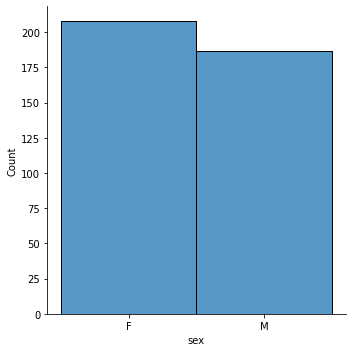

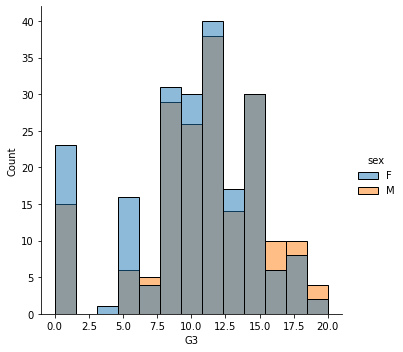

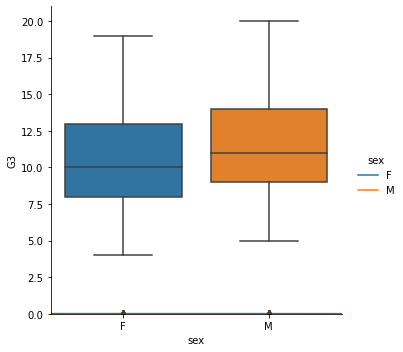

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

data=pd.read_csv("student-mat.csv")
data
sns.displot(data["sex"])
sns.displot(data, x="G3", hue="sex")
sns.displot(data, x="G3", hue="sex",kind="kde")
sns.boxplot(data=data, x="sex", y="G3")

data_m=data[data['sex'] == 'M']
data_w=data[data['sex'] == 'F']
print(data_m["G3"].mean())
print(data_w["G3"].mean())
print(data_m[data_m["G3"]>0]["G3"].mean())
print(data_w[data_w["G3"]>0]["G3"].mean())

from scipy.stats import bartlett
stat, p =bartlett(data_m[data_m["G3"]>0]["G3"], data_w[data_w["G3"]>0]["G3"])
print(stat,p)

stats.ttest_ind(data_m[data_m["G3"]>0]["G3"], data_w["G3"],equal_var=True)

In [86]:
#pearson test
from scipy import stats
import pandas as pd
import seaborn as sns
x=stats.norm.rvs(size=30)
e=stats.norm.rvs(scale=0.2, size=30)
y=x+e
df=pd.DataFrame([x,y]).T
print(stats.pearsonr(x,y))

#spearman test 
print(stats.pearsonr(x,y))
print(stats.spearmanr(x,y))

PearsonRResult(statistic=0.9888574198907695, pvalue=1.0405785289013285e-24)
PearsonRResult(statistic=0.9888574198907695, pvalue=1.0405785289013285e-24)
SpearmanrResult(correlation=0.9830923248053391, pvalue=3.4463918977722787e-22)


In [21]:
#chi-square test 
from scipy.stats import chisquare
observed_dice=[53222.52118,52465,52338,52244,532085]
chi_value, p_value = chisquare(observed_dice)
print("chi_val%.2f pvalue %.7f" %(chi_value, p_value))

observed_line=[97, 184, 93]
expected_line=[0.25*374, 0.5*374, 0.25*374]
chi_value, p_value = chisquare(observed_line, expected_line)
print("chi_val%.2f pvalue %.7f" %(chi_value, p_value))

chi_val1238965.41 pvalue 0.0000000
chi_val0.18 pvalue 0.9131007


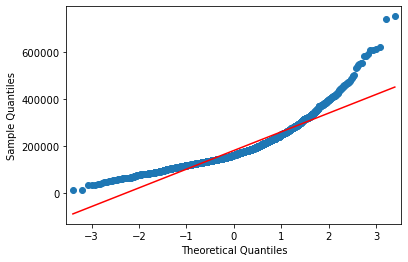

array(['GasA', 'GasW', 'Grav', 'Wall', 'Floor', 'OthW'], dtype=object)

In [3]:
import pandas as pd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_ameshousing=pd.read_csv("AmesHousing.csv")
df_ameshousing

qqplot(df_ameshousing['SalePrice'],line='s')
plt.show()

df_ameshousing['Heating'].unique()


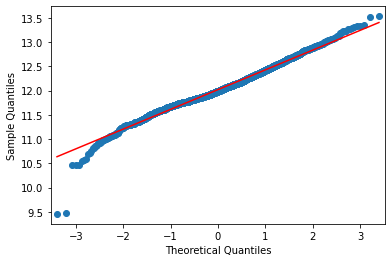

183     11.918391
213     11.444315
716     12.491173
722     11.350407
730     12.230765
793     11.736069
898     11.314475
929     11.970350
956     12.834681
1247    11.775290
1288    12.452933
1322    12.122691
1415    11.736069
1638    11.951180
1914    11.877569
1995    11.674194
1998    11.804849
2027    11.820410
2087    11.472103
2213    12.384219
2231    11.652687
2658    11.373663
2659    12.001505
2672    12.218495
2687    11.767568
2727    12.323856
2840    11.661345
Name: SalePrice_log_t, dtype: float64

In [5]:
df_ameshousing['SalePrice_log_t']=np.log(df_ameshousing['SalePrice'])
qqplot(df_ameshousing['SalePrice_log_t'],line='s')
plt.show()

In [43]:
#정규성 test - 0.16 정규성 만족 
from scipy.stats import levene
_, p = levene(df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'GasA'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'GasW'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Grav'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Wall'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Floor'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'OthW'])
print(p)

#one way anova - 2.8e-05 적어도 하나의 pair 다름
from scipy.stats import f_oneway
_, p = f_oneway(df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'GasA'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'GasW'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Grav'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Wall'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Floor'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'OthW'])
print(p)

#tukey - pair choose
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_ameshousing['SalePrice'],
                        groups=df_ameshousing['Heating'],
                         alpha=0.05)
print(tukey)

#kruskal-wall H-test : anova 비모수
from scipy import stats
_, p = stats.kruskal(df_ameshousing['SalePrice'][df_ameshousing['Heating'] == 'GasA'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'GasW'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Grav'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Wall'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'Floor'],
    df_ameshousing['SalePrice_log_t'][df_ameshousing['Heating'] == 'OthW'])
print(p)

0.16709011606143273
2.8022946827171358e-05
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
 Floor   GasA  109094.0756 0.7446 -117833.8318  336021.983  False
 Floor   GasW   86509.1852 0.8942 -144542.8442 317561.2145  False
 Floor   Grav   11211.1111    1.0 -227950.4607 250372.6829  False
 Floor   OthW      53250.0 0.9942 -224630.6354 331130.6354  False
 Floor   Wall       4650.0    1.0 -240417.6851 249717.6851  False
  GasA   GasW  -22584.8904 0.6848  -66453.4675  21283.6867  False
  GasA   Grav  -97882.9645 0.0032 -173630.3685 -22135.5604   True
  GasA   OthW  -55844.0756 0.9206 -216334.1354 104645.9843  False
  GasA   Wall -104444.0756 0.0168 -197167.2231  -11720.928   True
  GasW   Grav  -75298.0741 0.1369 -162627.5326  12031.3844  False
  GasW   OthW  -33259.1852 0.9929 -199529.5206 133011.1502  False
  GasW   Wall  -81859.1852 0.2027

C:\Users\gus10\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\gus10\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\gus10\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  warnings.warn('covariance of constraints does not have full '
C:\Users\gus10\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full 

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

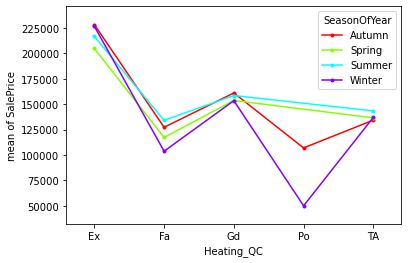

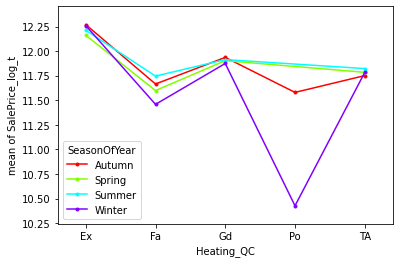

In [65]:
#two way anova : heating, 집팔린 계절-가격?
df_ameshousing['SeasonOfYear']=df_ameshousing['Mo Sold'].map({12:'Winter', 1:'Winter', 2:'Winter',
                                                            3:'Spring',4:'Spring',5:'Spring',
                                                            6:'Summer',7:'Summer',8:'Summer',
                                                            9: 'Autumn',10:'Autumn',11:'Autumn'})
df_ameshousing['Heating'].unique()
df_ameshousing[['SeasonOfYear', 'Mo Sold']]

df_ameshousing.rename(columns={'Heating QC':'Heating_QC'}, inplace=True)

from statsmodels.formula.api import ols
multiple_variables=ols('SalePrice ~ C(SeasonOfYear)+C(Heating_QC)+C(SeasonOfYear):C(Heating_QC)', data=df_ameshousing).fit()

import statsmodels.stats.api as sms
sms.anova_lm(multiple_variables, typ=2)

from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(df_ameshousing['Heating_QC'], df_ameshousing['SeasonOfYear'],df_ameshousing['SalePrice']).show

#log formation 
from statsmodels.formula.api import ols
multiple_variables=ols('SalePrice_log_t ~ C(SeasonOfYear)+C(Heating_QC)+C(SeasonOfYear):C(Heating_QC)', data=df_ameshousing).fit()

import statsmodels.stats.api as sms
sms.anova_lm(multiple_variables, typ=2)

from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(df_ameshousing['Heating_QC'], df_ameshousing['SeasonOfYear'],df_ameshousing['SalePrice_log_t']).show


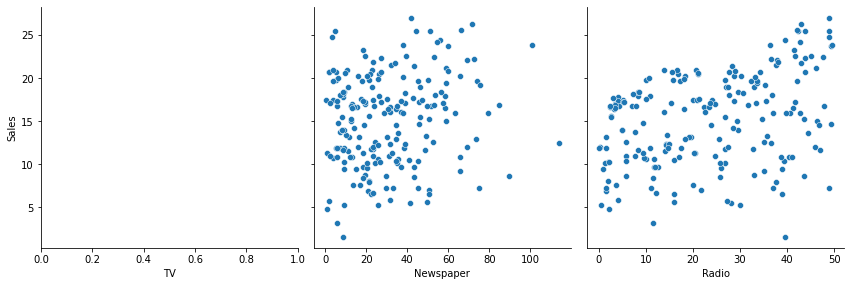

   const     TV
0    1.0  230.1
1    1.0   44.5
2    1.0   17.2
3    1.0  151.5
4    1.0  180.8


ValueError: endog and exog matrices are different sizes

In [85]:
#선형 회귀
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d=pd.read_csv('advertising.csv')
d.head()

sns.pairplot(d, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

import statsmodels.api as sm
X_const=sm.add_constant(X)
print(X_const.head())
lr=sm.OLS(y, X_const).fit()
Ir.params

import statsmodels.formula.api as smf
lr2=smf.old("Sales~TV", data=d).fit()
print(lr.summary())
plt.scatter(X,y)
plt.plot(X, 6.9748+0.5555*X, 'r')
plt.show()